<h1><center>Rugular Expressions -> A Description of text</center></h1>

### Imports

In [ ]:
import IPython # Has some useful tools
import re

### First Let's talk about opening Files


##### The "normal" way
```python
f = open('somefile.txt', 'r')
file_text = f.read()
f.close()
print(f)
```

##### A Wiser way
````python
with open('somefile.txt, 'r') as f:
          file_text = f.read()
          print(file_text)
```

### Step 1: Describe what Character/s or Possible Character/s
<iframe width="560" height="315" src="https://www.youtube.com/embed/sZyAn2TW7GY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

#### Specify the *literal character/s that could be here*

| Pattern | Matches |
| --- | --- |
| r'a' | a |
| r'ab' | ab |

#### Specify that *anything from a SET of characters could be here*

| Pattern | Matches |
| --- | --- |
| r'[abcd]' | *a or  b or c or d* |
| r'[1-gL]' | *1 or - or g or L* |

#### Specify that anything can be here except for the items in this set (NEGATION)

| Pattern | Matches |
| --- | --- |
| r'[^abcd]' | *any character except a, b, c or d* |
| r'[^1-gL]' | *any character except 1, -, g or L* |

### Step 2: Specify the Count or Possible Counts of ot the Specified Characters


| Pattern | Description |
| ------- | ----------- |
| \w{3} | matches any three word characters in a row. |
| \w{,3} | matches 0, 1, 2, or 3 word characters in a row. |
| \w{3,} | matches 3 or more word characters in a row. There's no upper limit. |
| \w{3, 5} | matches 3, 4, or 5 word characters in a row. |
| \w? | matches 0 or 1 word characters. |
| \w* | matches 0 or more word characters. Since there is no upper limit, this is, effectively, infinite word characters. |
| \w+ | matches 1 or more word characters. Like *, it has no upper limit, but it has to occur at least once. |

---

### Regex Syntax: Anchors

| Character | Description |
| --------- | ----------- |
| ^         | specifies, in a pattern, the beginning of the string. |
| $         | specifies, in a pattern, the end of the string. |

### Regex Syntax: Meta Characters


| Symbol | Notes |
| ------ | ----- |
| ^ | Matches the beggining of the line and is used in negation |
| $ | Matches end of the line |
| *, +, ? |  Repetition Symbols |
| { } | Repetitions |
| [ ] | Sets  |
| \   | Yes, you'll have to cancel out your cancelouter |
| |   | Used in Specifying alternates |
| (  )| Used for groupings |

### Special Sequences 
These are the most common not the entire list. 
[Here's the entire list](https://docs.python.org/3/library/re.html#re-syntax "docs.python.org")

|Character | Description |
| -------- | ----------- |
| \d | Matches any decimal digit; this is equivalent to the class [0-9]. | 
| \D | Matches any non-digit character; this is equivalent to the class [^0-9]. |
| \s | Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v]. |
| \S | Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v]. |
| \w | Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_]. |
| \W | Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_]. |

---

<b><h1><center>Pt 2: The Python Implementation</center></h1></b>

The regular expression language is a anguage of its own similar to SQL. Most programming languages will have a regex package built in and you benefit from reasonable consistency across languages.

*However*, in order to use regular expressions, you need to work with the functions, classes, methods etc. that the host language offers for interfacing with the regex engine.

### Most Common Used

| Method/Attribute | Purpose |
| ---------------- | ------- |
| match()	       | Determine if the RE matches at the beginning of the string. |
| search()         | Scan through a string, looking for any location where this RE matches. |
| findall()	       | Find all substrings where the RE matches, and returns them as a list. |
| finditer()       | Find all substrings where the RE matches, and returns them as an iterator. |

### Match Objects

match() and search() return an object that has it's own set of attributes and methods to work with

| Method/Attribute | Purpose |
| ---------------- | ------- |
| group() | Return the string matched by the RE |
| start() | Return the starting position of the match |
| end()	  | Return the ending position of the match |
| span()  | Return a tuple containing the (start, end) positions of the match |

### Compiling Regular Expressions

You can speed up regular expression operation if you do one step done ahead of time.

It also lets you name a variable and use dot notation to call .search(), .match() 
Again, use dir

#### Some functions do not need explicit compilation
```python
# These for example do not
re.search(r'[abc]', 'apple')
re.match(r'[abc]', 'apple')
```
*They are "Module-Level Functions"*

```python
p = re.compile('[a-z]+')
```

In [9]:
import time, re
 
text1 = '<h1>match me</h1>'
regex1= '<h1>(.*?)</h1>'
 
text2 = '<h2>match me</h2>'
regex2= '<h2>(.*?)</h2>'
 
text3 = '<h3>match me</h3>'
regex3= '<h3>(.*?)</h3>'
 
re_flags = re.IGNORECASE|re.MULTILINE|re.DOTALL|re.UNICODE
arr =[]
for (step,max_iterations) in [(1,10), (10,100),(100,1000),(1000,10000)]: #,(10000,100000),(100000,1000000)]:
    arr += [num for num in range (step, max_iterations + step, step)]
 
for max in arr:
    print('-'*50)
    t1 = time.time()
    re_compiled = re.compile(regex1+str(max), re_flags) # pre-compiling and storing regex
    for _ in range(0, max):
        re_compiled.findall(text1+str(max)+' '+str(_))
    t2 = time.time()
    print("%5i calls in % 8.3f ms - compiled_once"%(max, (t2-t1)*1000.0) )
 
    t3 = time.time()
    regex2_max = regex2+str(max) # doing this here to avoid costs of string concatation in a loop
    for _ in range(0, max):
        re.compile(regex2_max, re_flags).findall(text2+str(max)+' '+str(_))
    t4 = time.time()
    print("%5i calls in % 8.3f ms - compiled_every_call"%(max, (t4-t3)*1000.0) )
 
    t5 = time.time()
    regex3_max = regex3+str(max)# doing this here to avoid costs of string concatation in a loop
    for _ in range(0, max):
        re.findall(regex3_max, text3+str(max)+' '+str(_), re_flags)
    t6 = time.time()
    print("%5i calls in % 8.3f ms - uncompiled"%(max, (t6-t5)*1000.0) )
print('-'*50)

--------------------------------------------------
    1 calls in    0.217 ms - compiled_once
    1 calls in    0.186 ms - compiled_every_call
    1 calls in    0.283 ms - uncompiled
--------------------------------------------------
    2 calls in    0.257 ms - compiled_once
    2 calls in    0.498 ms - compiled_every_call
    2 calls in    0.181 ms - uncompiled
--------------------------------------------------
    3 calls in    0.143 ms - compiled_once
    3 calls in    0.093 ms - compiled_every_call
    3 calls in    0.083 ms - uncompiled
--------------------------------------------------
    4 calls in    0.078 ms - compiled_once
    4 calls in    0.080 ms - compiled_every_call
    4 calls in    0.079 ms - uncompiled
--------------------------------------------------
    5 calls in    0.082 ms - compiled_once
    5 calls in    0.080 ms - compiled_every_call
    5 calls in    0.164 ms - uncompiled
--------------------------------------------------
    6 calls in    0.093 ms - compi

60000 calls in   83.532 ms - compiled_once
60000 calls in  130.598 ms - compiled_every_call
60000 calls in  114.829 ms - uncompiled
--------------------------------------------------
70000 calls in   76.574 ms - compiled_once
70000 calls in  142.957 ms - compiled_every_call
70000 calls in  154.298 ms - uncompiled
--------------------------------------------------
80000 calls in   84.822 ms - compiled_once
80000 calls in  191.840 ms - compiled_every_call
80000 calls in  161.248 ms - uncompiled
--------------------------------------------------
90000 calls in   95.475 ms - compiled_once
90000 calls in  272.114 ms - compiled_every_call
90000 calls in  296.803 ms - uncompiled
--------------------------------------------------
100000 calls in  111.277 ms - compiled_once
100000 calls in  197.251 ms - compiled_every_call
100000 calls in  187.325 ms - uncompiled
--------------------------------------------------
100000 calls in  107.223 ms - compiled_once
100000 calls in  192.875 ms - compiled

### Flags

Compilation flags let you modify some aspects of how regular expressions work. Flags are available in the re module under two names, a long name such as IGNORECASE and a short, one-letter form such as I. (If you’re familiar with Perl’s pattern modifiers, the one-letter forms use the same letters; the short form of re.VERBOSE is re.X, for example.) Multiple flags can be specified by bitwise OR-ing them; re.I | re.M sets both the I and M flags, for example.

Here’s a table of the available flags, followed by a more detailed explanation of each one.

| Flag | Meaning |
| ---- | ------- |
| ASCII, A | Makes several escapes like \w, \b, \s and \d match only on ASCII characters with the respective property.|
| DOTALL, S | Make . match any character, including newlines. |
| IGNORECASE, I | Do case-insensitive matches. |
| LOCALE, L | Do a locale-aware match. | 
| MULTILINE, M | Multi-line matching, affecting ^ and $. |
| VERBOSE, X (for ‘extended’) | Enable verbose REs, which can be organized more cleanly and understandably. |

---

<h1><center>Code Demos</center></h1>

### search()/match() 

In [58]:
string = "Python is fun"

# check if 'Python' is at the beginning
match = re.search('\APython', string)

if match:
  print("pattern found inside the string")
else:
  print("pattern not found")  


pattern found inside the string


In [47]:
string = '39801 356, 2102 1111'

# Three digit number followed by space followed by two digit number
pattern = '(\d{3}) (\d{2})'

# match variable contains a Match object.
match = re.search(pattern, string) 

if match:
  print(match.group())
else:
  print("pattern not found")


801 35


In [38]:
match.group(1)

'801'

In [39]:
match.group(2)

'35'

In [40]:
match.group(1, 2)

('801', '35')

In [41]:
match.groups()

('801', '35')

In [42]:
match.start()

2

In [48]:
match.span()

(2, 8)

In [49]:
match.re

re.compile(r'(\d{3}) (\d{2})', re.UNICODE)

In [50]:
match.string

'39801 356, 2102 1111'

### Splitting Strings

In [52]:
import re

string = 'Twelve:12 Eighty nine:89.'
pattern = '\d+'

result = re.split(pattern, string) 
print(result)

# Output: ['Twelve:', ' Eighty nine:', '.']

['Twelve:', ' Eighty nine:', '.']


In [3]:
string = 'Twelve:12 Eighty nine:89 Nine:9.'
pattern = '\d+'

# maxsplit = 1
# split only at the first occurrence
result = re.split(pattern, string, 1) 
result

['Twelve:', ' Eighty nine:89 Nine:9.']

### Substitution

In [32]:
re.sub(pattern, replace, string)

'Twelve: Eighty nine: Nine:.'

In [55]:
# multiline string
string = 'abc 12\
de 23 \n f45 6'

# matches all whitespace characters
pattern = '\s+'

# empty string
replace = ''

new_string = re.sub(pattern, replace, string) 
new_string

'abc12de23f456'

In [56]:
# multiline string
string = 'abc 12\
de 23 \n f45 6'

# matches all whitespace characters
pattern = '\s+'
replace = ''

new_string = re.sub(r'\s+', replace, string, 1) 
new_string

'abc12de 23 \n f45 6'

In [35]:
# multiline string
string = 'abc 12\
de 23 \n f45 6'

# matches all whitespace characters
pattern = '\s+'

# empty string
replace = ''

new_string = re.subn(pattern, replace, string) 

new_string

('abc12de23f456', 4)

In [51]:
string = '\n and \r are escape sequences.'

result = re.findall(r'[\n\r]', string) 
print(result)

['\n', '\r']


## Sets
```
[abc]
```

### Negation
```
[^abc]
```

### Flags
```
re.IGNORECASE or re.I
re.VERBOSE or re.X
```

### Using Groups

| Entity | Description |
| ------ | ----------- |
| ([abc]) | creates a group that contains a set for the letters 'a', 'b', and 'c'. This could be later accessed from the Match object as .group(1) |
|(?P<name>[abc]) | creates a named group that contains a set for the letters 'a', 'b', and 'c'. This could later be accessed from the Match object as .group('name'). |
| .groups() | method to show all of the groups on a Match object. |
| re.MULTILINE or re.M | flag to make a pattern regard lines in your text as the beginning or end of a string. |


In [11]:
string = '''Love, Kenneth: 20
Chalkley, Andrew: 25
McFarland, Dave: 10
Kesten, Joy: 22
Stewart Pinchback, Pinckney Benton: 18'''

players = re.search(r'''
  (?P<last_name>[\w ]*)
  ,\s
  (?P<first_name>[\w ]*)
  :\s
  (?P<score>[\d]*)
''', string, re.X | re.M)
players

<re.Match object; span=(0, 17), match='Love, Kenneth: 20'>

### Unfinished Examples

In [13]:
result = [f for f in files if re.search(r'_\d{2}\.csv$', f)] 

NameError: name 'files' is not defined

In [15]:
import re

spellings_list = [
    "Looavul",
    "Luhvul",
    "Loueville",
    "Spam",
    "Looaville",
    "Looeyville"]

spellings_string = "LooavulLuhvulLouevilleSpamLooavilleLooeyville"
pattern = r''

# Program to extract numbers from a string
result = re.findall(pattern, string) 
print(result)

# Program to extract numbers from the list
for i in spellings_list:
    if re.match(r'', i):
        print(i)

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
Looavul
Luhvul
Loueville
Spam
Looaville
Looeyville


<h1><center>Random Things to Know</center></h1>

* You don't need to know about all of the characters or all of the ways of doing one thing
I like to generally trend towards useing features that are the most consistent. [For instance the popular UNIX stream editing tool sed does not use \d but I can use [0-9] for both](https://www.gnu.org/software/sed/manual/html_node/Regular-Expressions.html "Sed Command Syntax Page")



<h1><center>References</center></h1>

* https://www.programiz.com/python-programming/regex#python-regex
* https://www.gnu.org/software/sed/manual/html_node/Regular-Expressions.html

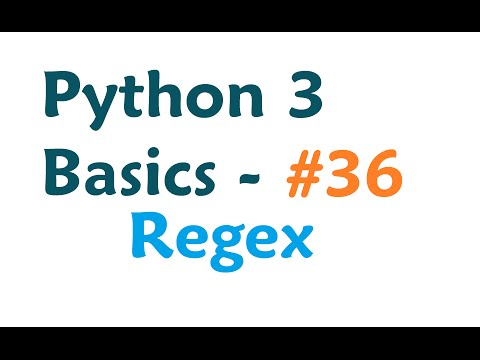

In [2]:
IPython.display.YouTubeVideo("sZyAn2TW7GY")